In [2]:
from xml.sax import make_parser
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.cluster import hierarchy as hc
from sklearn.linear_model import LinearRegression
import missingno as msno 
import streamlit as st 
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.linear_model import Lasso


In [3]:
df = pd.read_csv("df.csv")

In [4]:
df = df.drop('lat',axis=1)
df = df.drop('long',axis=1)
df = df.drop('surface_liv15',axis=1)
df = df.drop('surface_lot15',axis=1)

In [5]:
tabcorr = df.corr() 

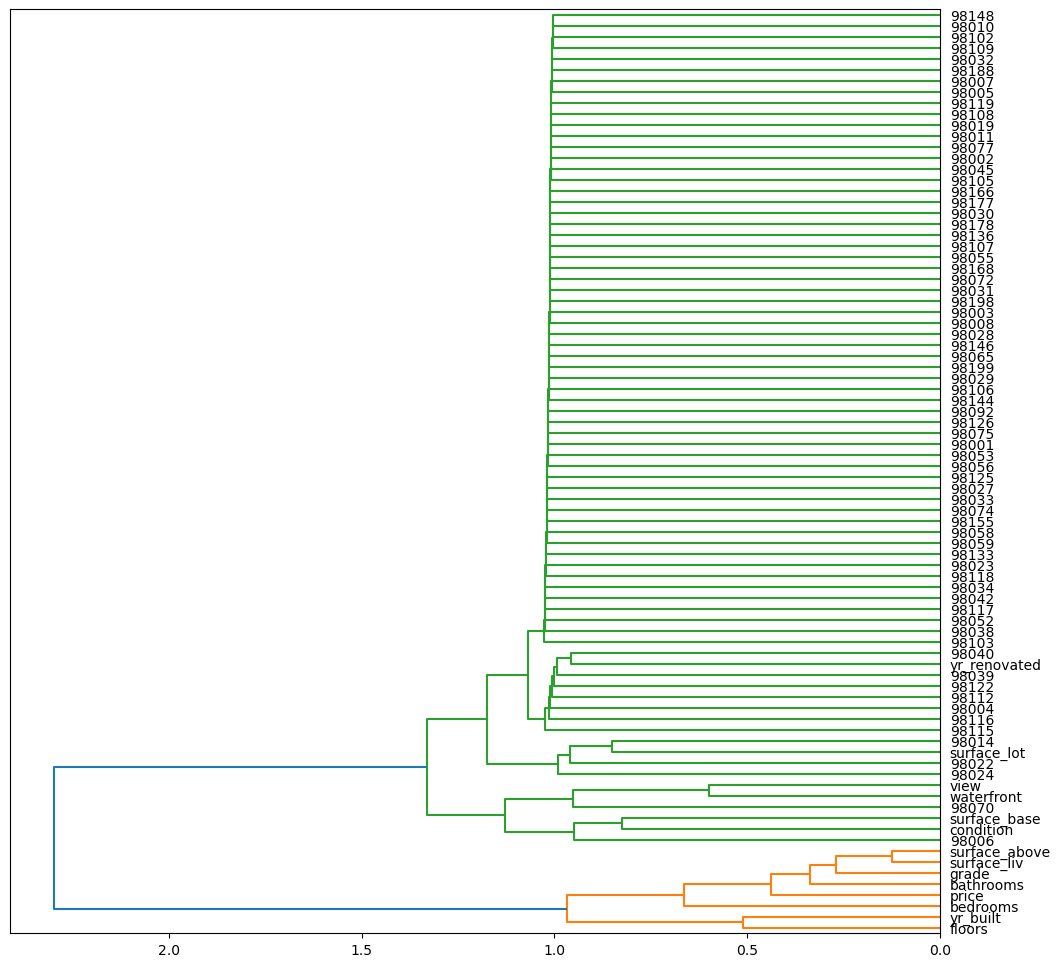

In [6]:
corr = 1 - df.corr()
corr_condensed = hc.distance.squareform(corr)
link = hc.linkage(corr_condensed, method='ward')
plt.figure(figsize=(12,12))
den = hc.dendrogram(link, labels=df.columns, orientation='left', leaf_font_size=10)

In [7]:
correlations = tabcorr.price
print(correlations)

price            1.000000
bedrooms         0.315445
bathrooms        0.525147
floors           0.256811
waterfront       0.266371
view             0.397299
condition        0.036336
grade            0.667447
yr_built         0.054023
yr_renovated     0.126437
surface_liv      0.702047
surface_above    0.605591
surface_base     0.323812
surface_lot      0.089664
98001           -0.092178
98002           -0.080299
98003           -0.076760
98004            0.271133
98005            0.065115
98006            0.133697
98007            0.017001
98008            0.033077
98010           -0.021620
98011           -0.012926
98014           -0.017478
98019           -0.029576
98022           -0.063941
98023           -0.106092
98024            0.006757
98027            0.029203
98028           -0.024349
98029            0.024271
98030           -0.072736
98031           -0.073938
98032           -0.059997
98033            0.102558
98034           -0.008075
98038           -0.079043
98039       

In [8]:
correlations = correlations.drop(['price'],axis=0)

In [9]:
print(abs(correlations).sort_values(ascending=False))

surface_liv      0.702047
grade            0.667447
surface_above    0.605591
bathrooms        0.525147
view             0.397299
surface_base     0.323812
bedrooms         0.315445
98004            0.271133
waterfront       0.266371
floors           0.256811
98039            0.212559
98040            0.204875
98112            0.169844
98006            0.133697
yr_renovated     0.126437
98023            0.106092
98033            0.102558
98042            0.100369
98001            0.092178
98168            0.091664
98105            0.090975
surface_lot      0.089664
98075            0.088678
98199            0.083661
98002            0.080299
98038            0.079043
98119            0.078086
98003            0.076760
98106            0.075364
98058            0.074487
98198            0.074024
98031            0.073938
98030            0.072736
98055            0.071978
98092            0.071803
98178            0.069241
98102            0.068739
98109            0.065847
98005       

In [10]:
continuous_features = ['sqft_living','sqrt_log','sqft_above','sqft_basement','sqft_living15','sqrt_lot15','lat','long']
discrete_features = ['bedrooms','bathrooms','floors','waterfront','view','condition',
                     'grade','yr_built','yr_renovated']

In [11]:
df1 = df[df.price<1000000].drop(discrete_features, axis=1)

In [12]:
X = df1.drop(['price'], axis=1)
y = df1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [13]:
X

,surface_liv,surface_above,surface_base,surface_lot,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,109.62554,109.62554,0.00000,524.901950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,238.76071,201.59951,37.16120,672.803526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,71.53531,71.53531,0.00000,929.030000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,182.08988,97.54815,84.54173,464.515000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,156.07704,156.07704,0.00000,750.656240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,142.14159,142.14159,0.00000,105.073293,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21608,214.60593,214.60593,0.00000,540.045139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21609,94.76106,94.76106,0.00000,125.419050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21610,148.64480,148.64480,0.00000,221.852364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21607    360000.0
21608    400000.0
21609    402101.0
21610    400000.0
21611    325000.0
Name: price, Length: 20120, dtype: float64

In [15]:
lr = Lasso()
lr.fit(X_train, y_train)          
y_predi = lr.predict(X_test)  

/home/jadamin/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.184e+11, tolerance: 6.938e+10
  model = cd_fast.enet_coordinate_descent(


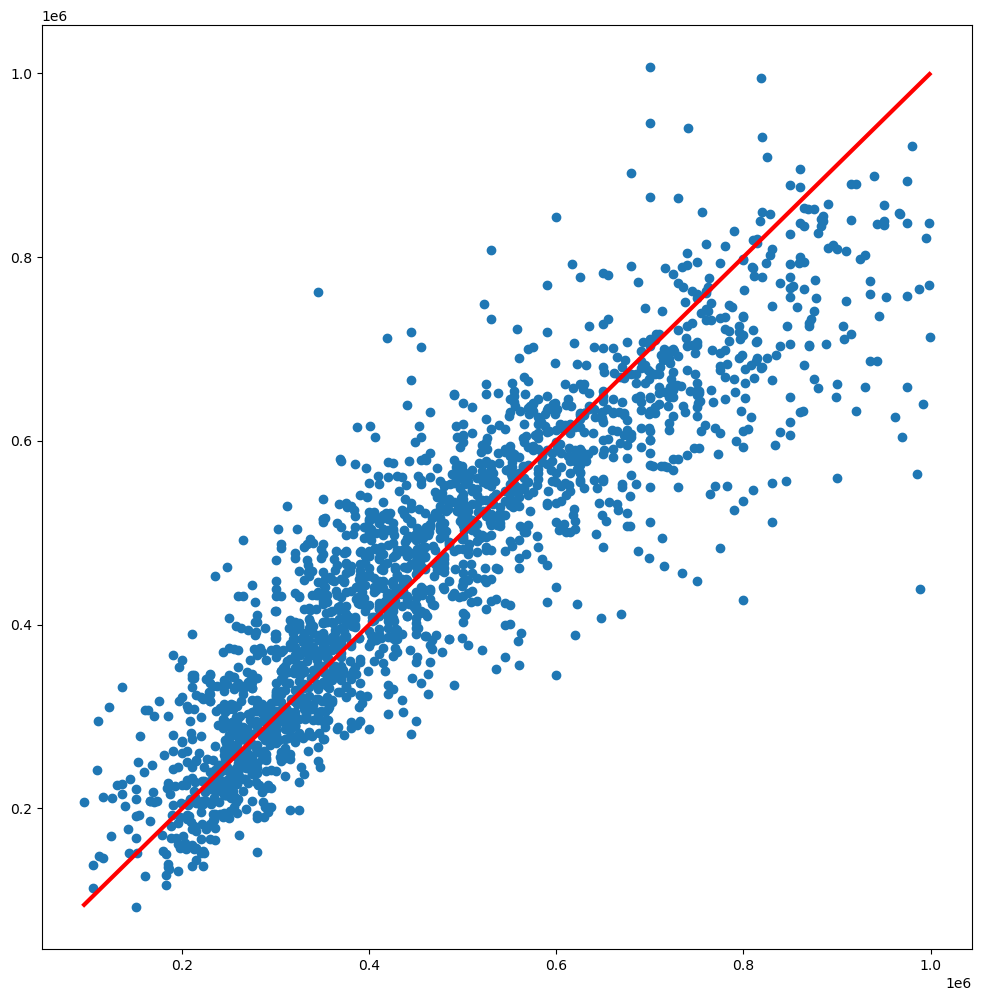

In [16]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_predi)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)

In [17]:
lr.score(X_test,y_test)

0.8003417704865485

In [18]:
df.to_csv('df2.csv',index=False)